#Stock Price Prediction


#####In this Machine Learning project we will use linear regeression to build a model. Then we will evaluate this linear regression model with the help of our dataset splitted into train and test data for evaluation. Ultimately we will use the model on our test data to determine it's accuracy. This is a beginner friendly project.

####Importing the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Stock Price Prediction/datasets/AAPL_stockDataSet-new.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347939,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634834,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213615,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869293,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041481,132079200


In [4]:
df.describe

<bound method NDFrame.describe of            Date        Open        High         Low       Close   Adj Close  \
0    2020-01-02   74.059998   75.150002   73.797501   75.087502   73.347939   
1    2020-01-03   74.287498   75.144997   74.125000   74.357498   72.634834   
2    2020-01-06   73.447502   74.989998   73.187500   74.949997   73.213615   
3    2020-01-07   74.959999   75.224998   74.370003   74.597504   72.869293   
4    2020-01-08   74.290001   76.110001   74.290001   75.797501   74.041481   
..          ...         ...         ...         ...         ...         ...   
751  2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
752  2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
753  2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674026   
754  2022-12-29  127.989998  130.479996  127.730003  129.610001  129.233658   
755  2022-12-30  128.410004  129.949997  127.430000  129.929993  129.552719   

        Volume  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       756 non-null    object 
 1   Open       756 non-null    float64
 2   High       756 non-null    float64
 3   Low        756 non-null    float64
 4   Close      756 non-null    float64
 5   Adj Close  756 non-null    float64
 6   Volume     756 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.5+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

##Now we begin our Data Exploration


In [7]:
#For checking the first few rows of the DataFrame
print(df.head())

#For checking summary statistics of the dataset
print(df.describe())

#For checking for missing values
print(df.isnull().sum())


        Date       Open       High        Low      Close  Adj Close     Volume
0 2020-01-02  74.059998  75.150002  73.797501  75.087502  73.347939  135480400
1 2020-01-03  74.287498  75.144997  74.125000  74.357498  72.634834  146322800
2 2020-01-06  73.447502  74.989998  73.187500  74.949997  73.213615  118387200
3 2020-01-07  74.959999  75.224998  74.370003  74.597504  72.869293  108872000
4 2020-01-08  74.290001  76.110001  74.290001  75.797501  74.041481  132079200
             Open        High         Low       Close   Adj Close  \
count  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   130.231998  131.892775  128.614983  130.311812  128.910999   
std     30.596429   30.841435   30.287325   30.566496   30.726050   
min     57.020000   57.125000   53.152500   56.092499   54.923038   
25%    115.924374  117.275000  114.129997  115.739374  113.838002   
50%    135.794999  137.200005  133.750000  135.379997  134.342507   
75%    150.259998  151.902504  149.029995  

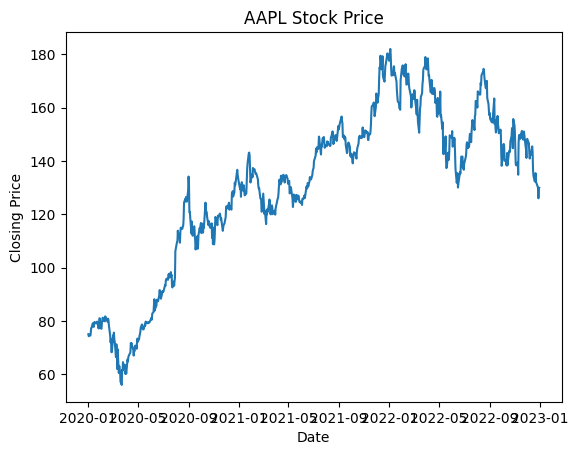

In [8]:
#Data Visualization


import matplotlib.pyplot as plt

# Line plot of closing prices
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price')
plt.show()


In [9]:
#Data Preprocessing

# Handle missing values
df = df.dropna()

# Feature engineering (if needed)
# e.g., creating lagged features, moving averages, etc.

# Scale the numerical features (if needed)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaled_data


In [10]:
#Splitting the Data

from sklearn.model_selection import train_test_split

X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Choose a Prediction Model

from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [12]:
#Model Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 6.742801682923071e-05
Mean Absolute Error: 0.0059116381845810756
R-squared: 0.9989457504766232


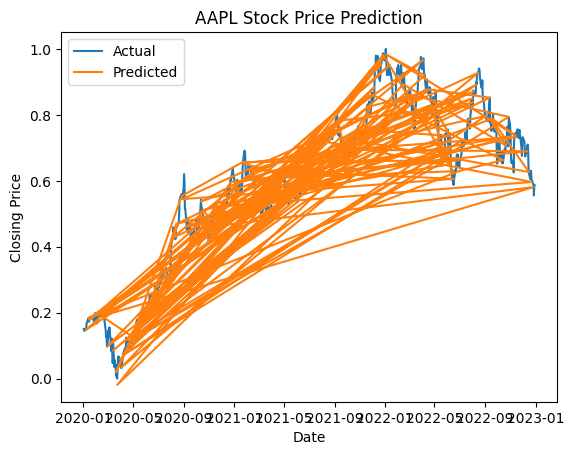

In [13]:
#Making Future Predictions
plt.plot(df['Date'], df['Close'], label='Actual')
plt.plot(df.loc[X_test.index, 'Date'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()
